In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import geopandas as gpd
from PIL import Image

## Scenes coverage

In [2]:
scenes_files = [f for f in os.listdir("/vida/work/GDPFinder/GDPFinder/data/scenes_metadata") if f[-7:] == "geojson"]
cities_shp = gpd.read_file("/vida/work/GDPFinder/GDPFinder/data/CityBoundaries.shp")
cities_shp = cities_shp.to_crs("EPSG:4326")
cities_shp["city_name"] = cities_shp.NAME.apply(lambda x : x.lower().replace(" ", "_").replace("-", "_"))
cities_shp["state_name"] = cities_shp.ST.apply(lambda x : x.lower())

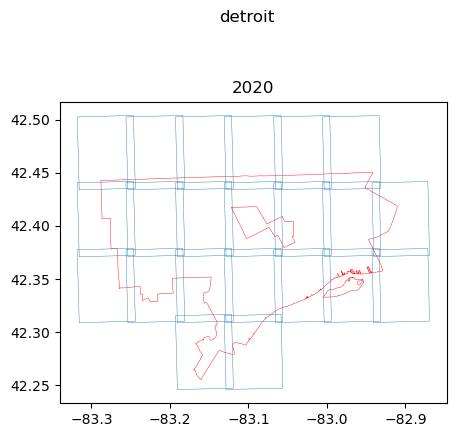

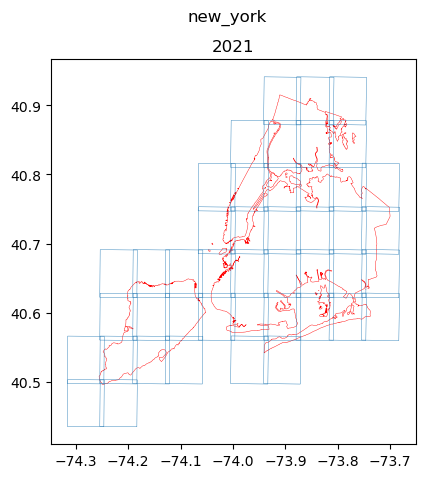

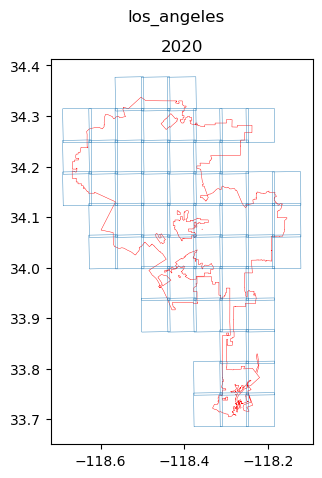

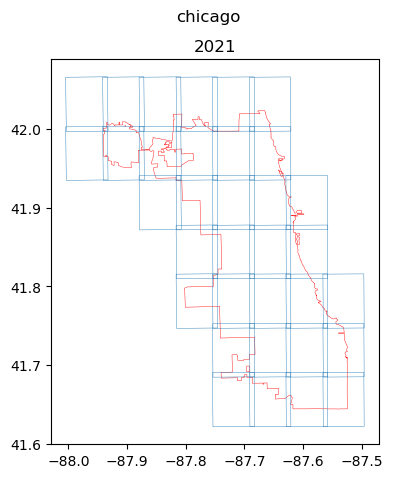

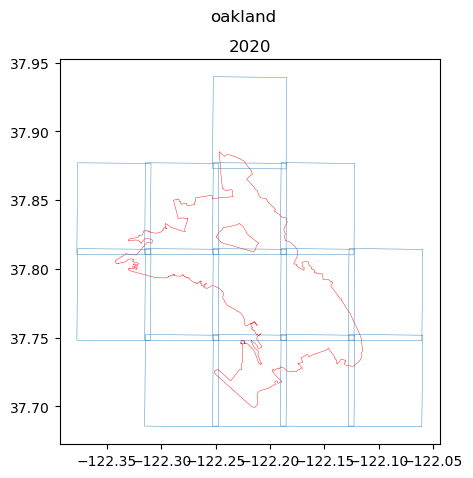

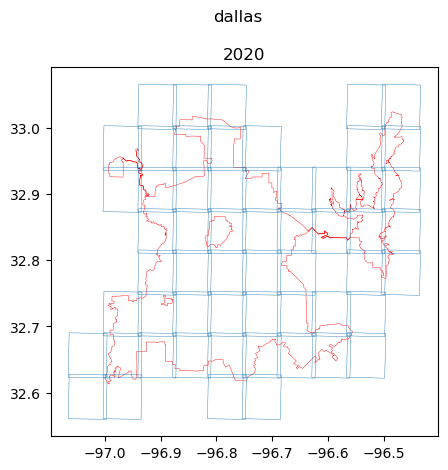

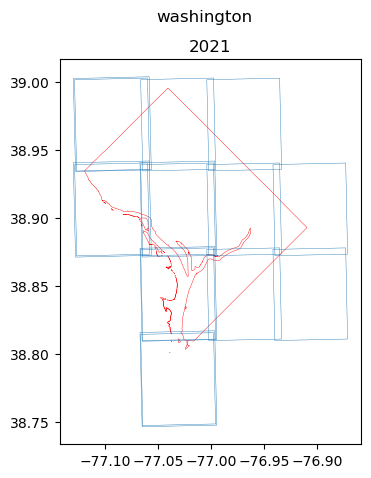

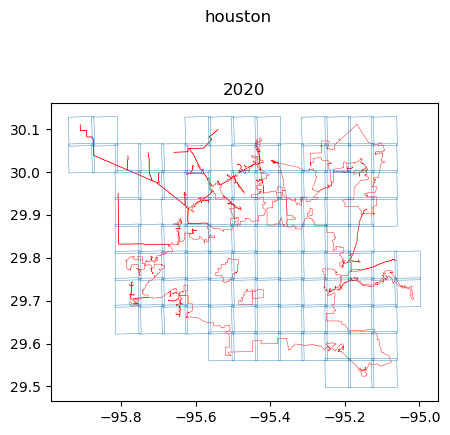

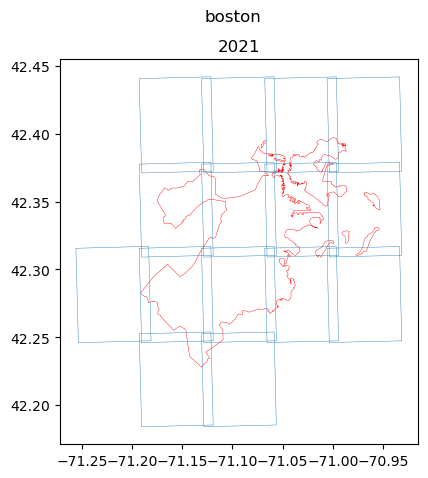

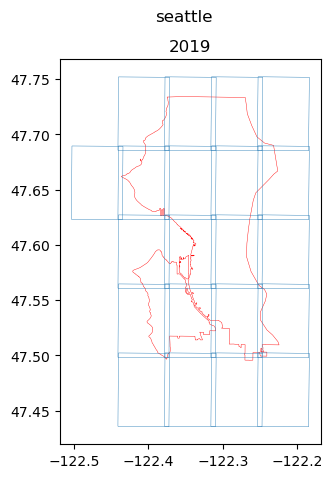

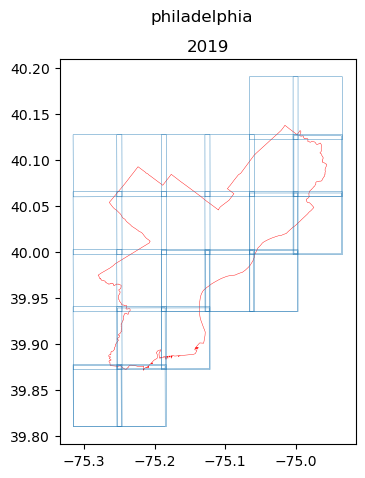

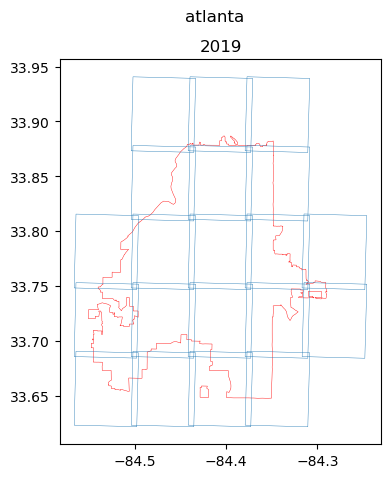

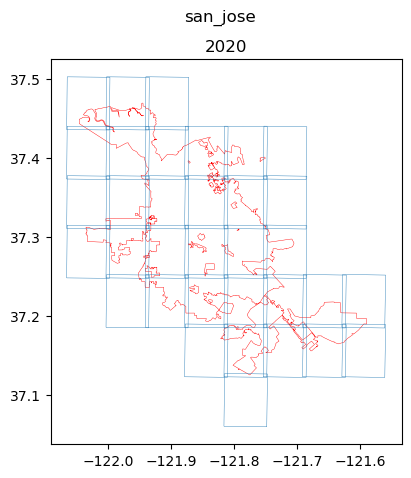

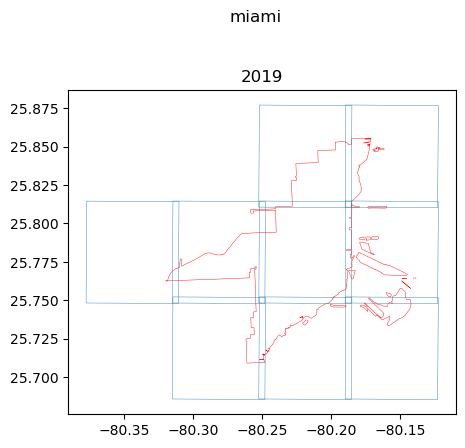

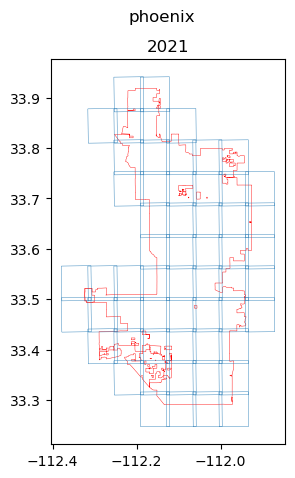

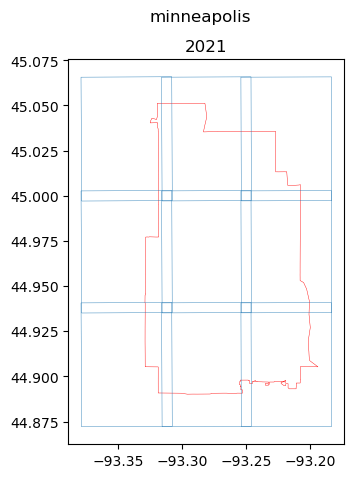

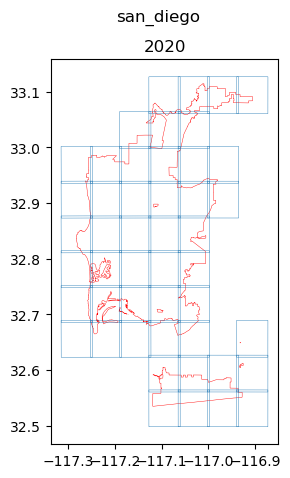

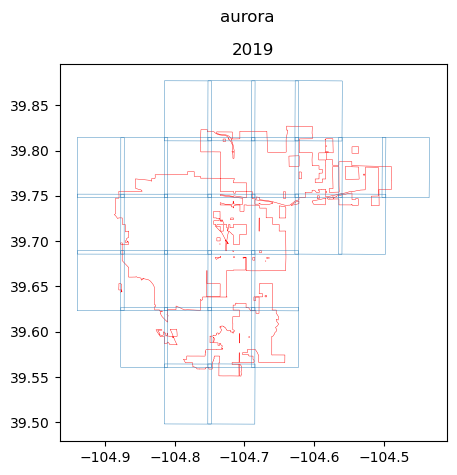

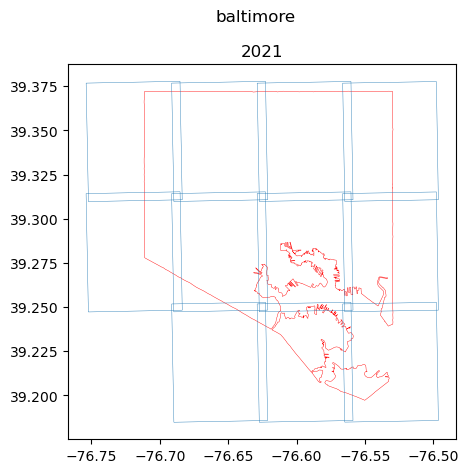

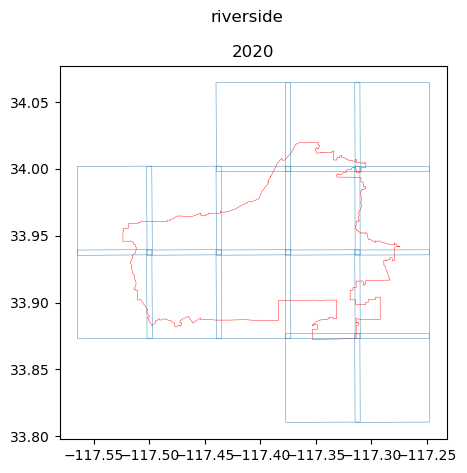

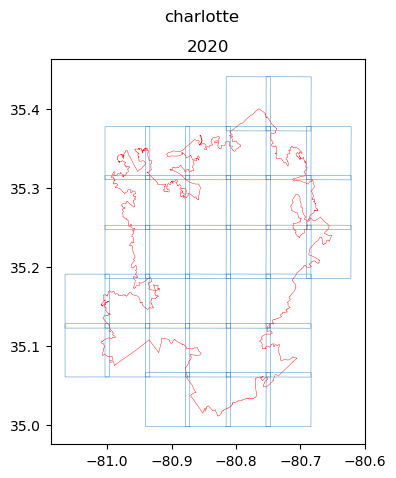

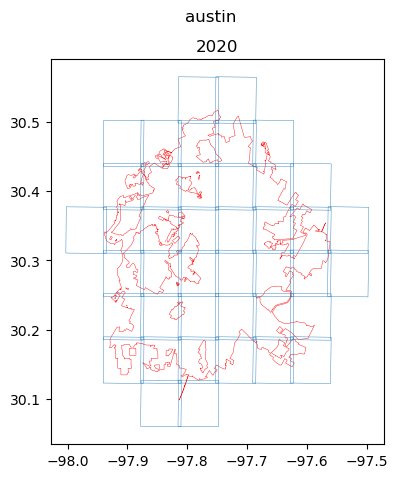

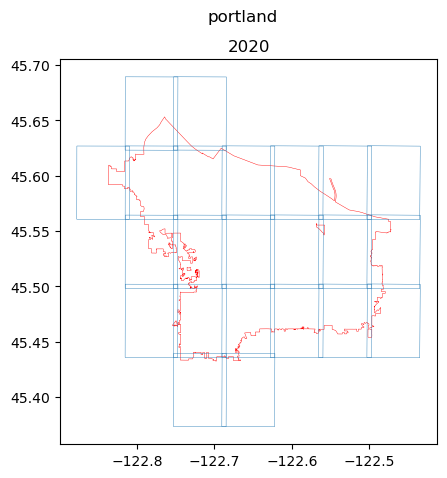

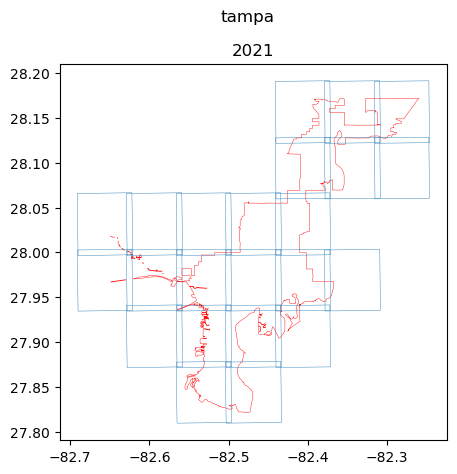

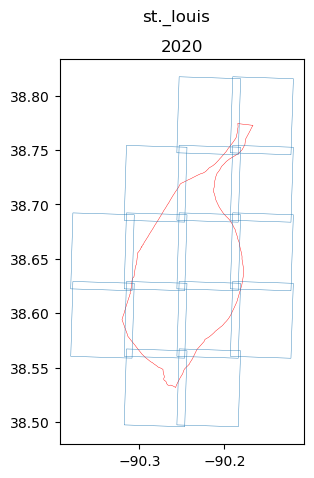

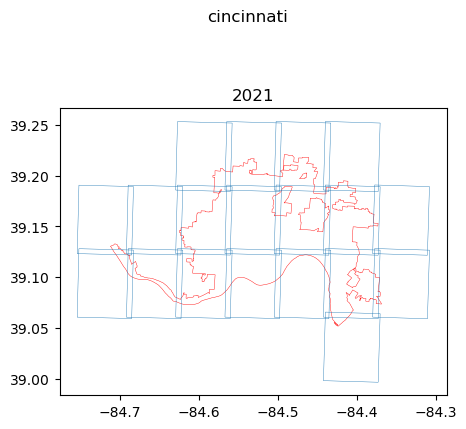

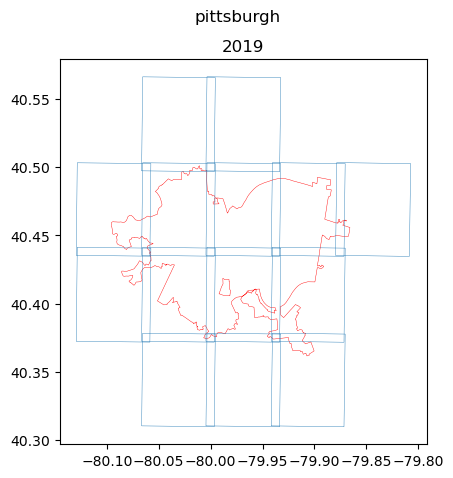

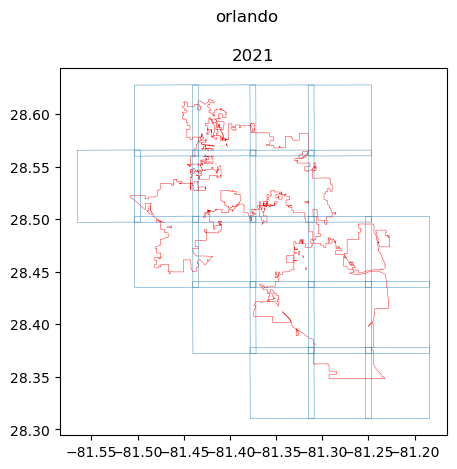

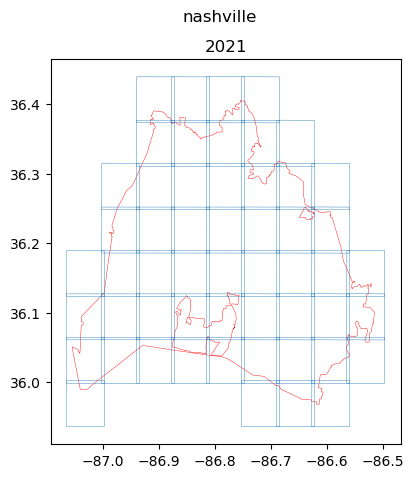

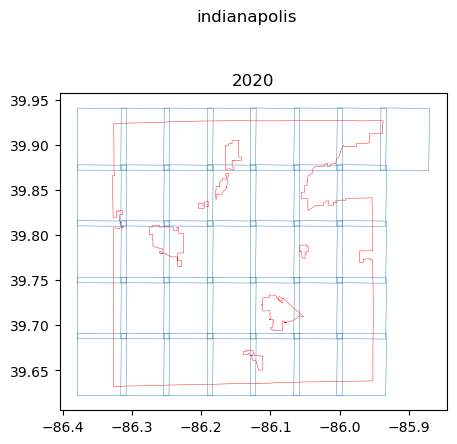

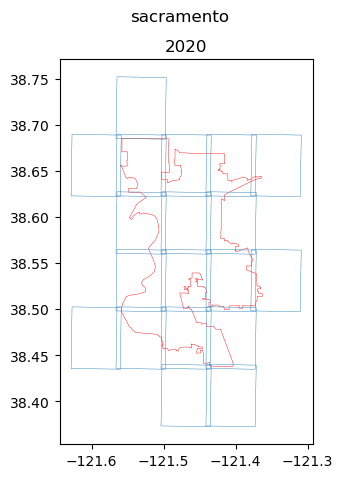

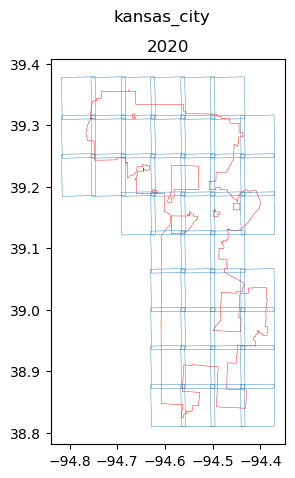

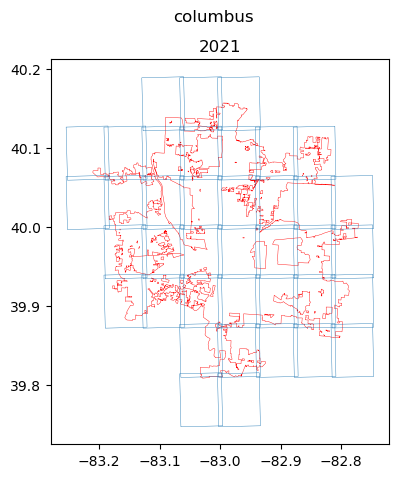

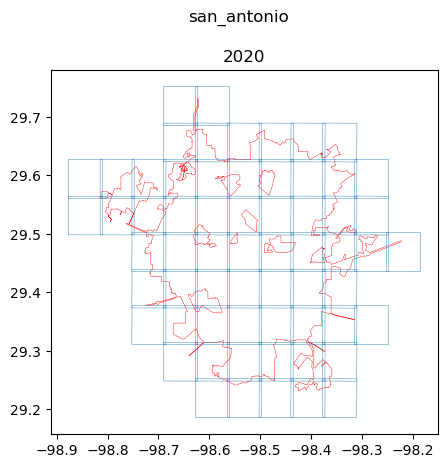

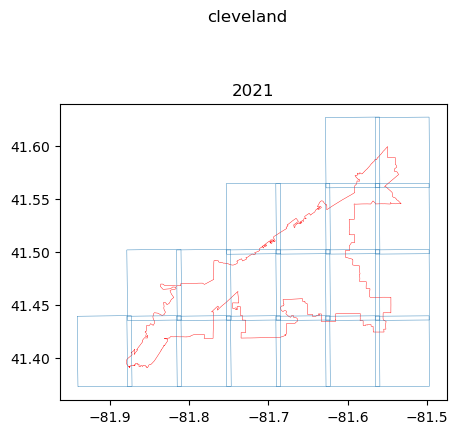

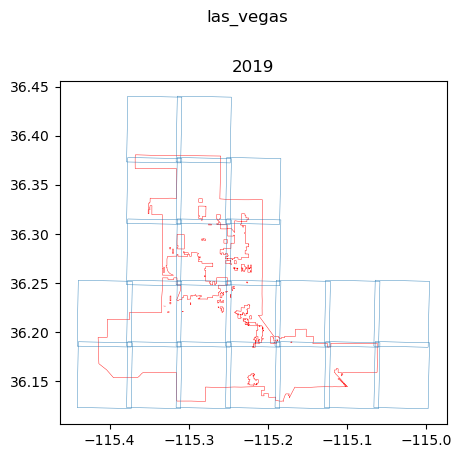

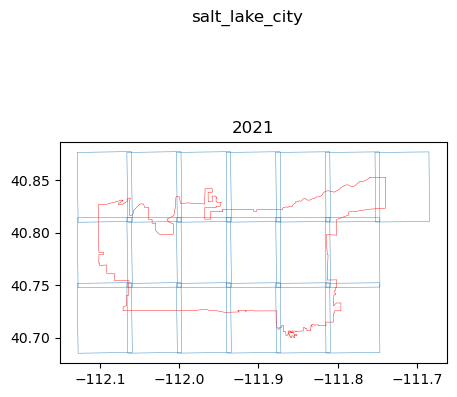

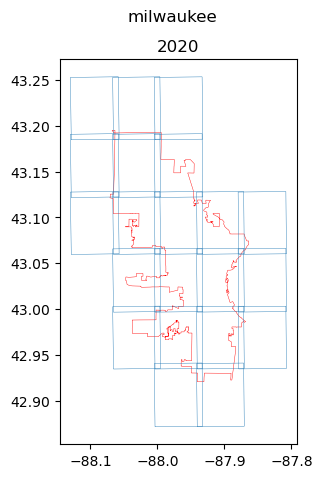

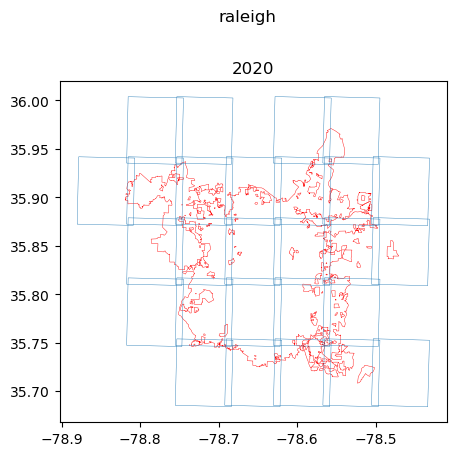

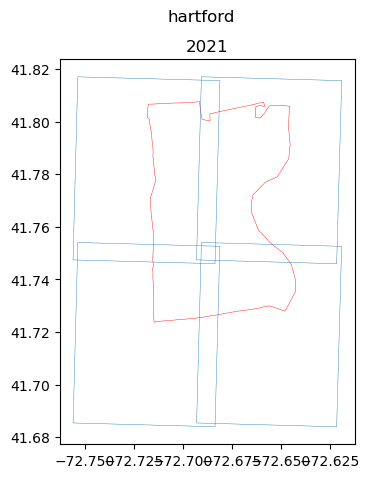

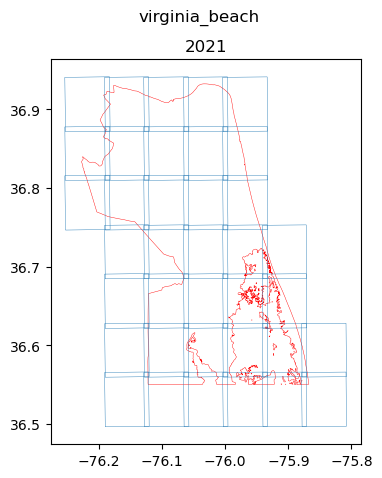

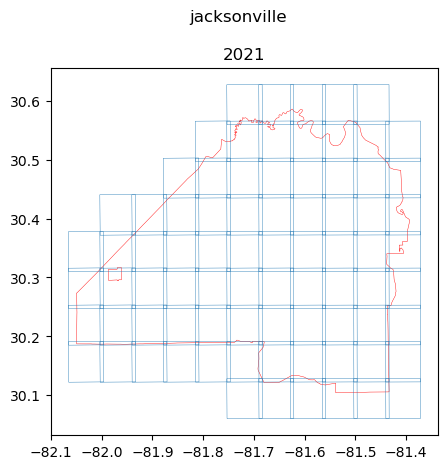

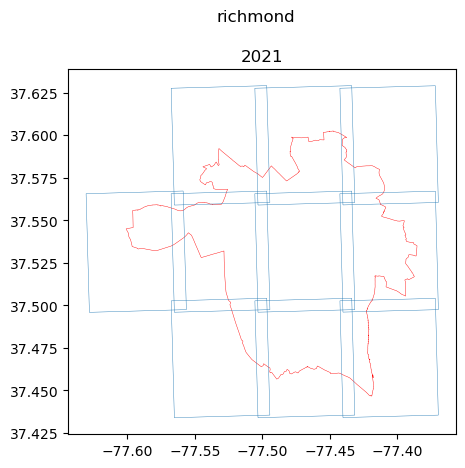

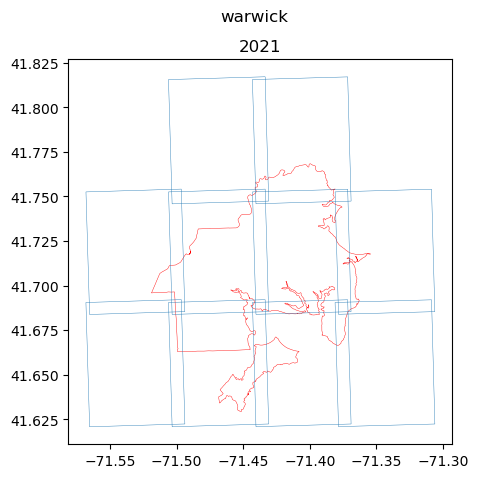

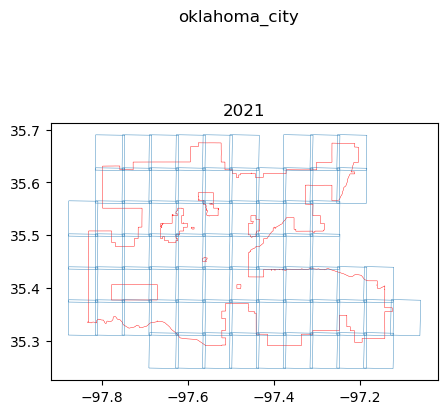

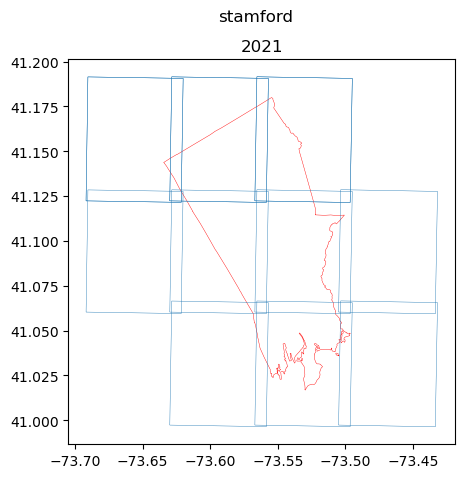

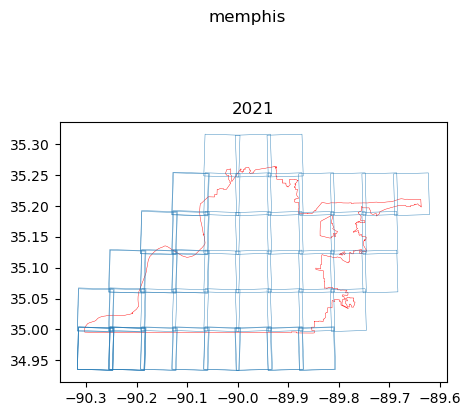

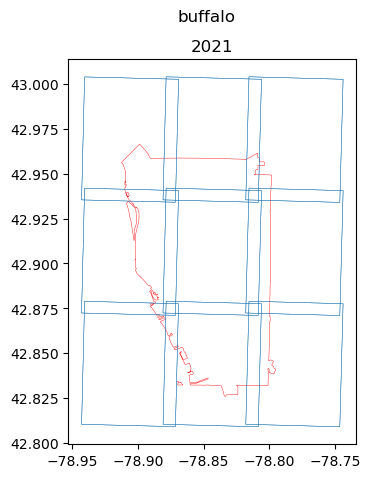

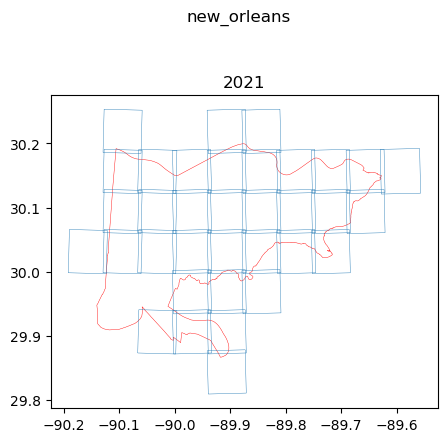

In [3]:
for scene in scenes_files:
    scenes_shp = gpd.read_file(f"/vida/work/GDPFinder/GDPFinder/data/scenes_metadata/{scene}")
    unique_years = scenes_shp.year.unique()
    unique_years.sort()
    n_years = len(unique_years)
    fig, axs = plt.subplots(nrows = 1, ncols = n_years, figsize = (n_years * 5, 5))
    if type(axs) == mpl.axes._axes.Axes:
        axs = [axs]
    for i, t in enumerate(unique_years):
        scene_name = scene.replace("_last_scenes.geojson", "")
        city = scene_name[:-3]
        state = scene_name[-2:]
        cities_shp[(cities_shp.city_name == city) & (cities_shp.state_name == state)].boundary.plot(color = "r", linewidth = 0.3, ax = axs[i])
        scenes_shp[scenes_shp.year == t].boundary.plot(linewidth = 0.3, ax = axs[i])
        axs[i].set_title(t)
    plt.suptitle(city)
    plt.show()

## Scenes distribution

In [2]:
scenes_files = [f for f in os.listdir("/vida/work/GDPFinder/GDPFinder/data/scenes_metadata") if f[-7:] == "geojson"]
scenes_df = []
for f in scenes_files:
    scene_name = f.replace("_last_scenes.geojson", "")
    city = scene_name[:-3]
    state = scene_name[-2:]
    new_scene_df = gpd.read_file(f"../data/scenes_metadata/{f}")
    new_scene_df["city"] = city
    new_scene_df["state"] = state
    new_scene_df["city_state"] = city + "_" + state
    scenes_df.append(new_scene_df)
scenes_df = pd.concat(scenes_df)
scenes_df.head()

,dataset,entity_id,start_date,end_date,product_id,year,geometry,city,state,city_state
0,naip,3061649,2020-06-30,2020-06-30,5e83a340275f0f2c,2020,"POLYGON ((-83.00351 42.30915, -82.93136 42.310...",detroit,mi,detroit_mi
1,naip,3061838,2020-06-30,2020-06-30,5e83a340275f0f2c,2020,"POLYGON ((-83.06550 42.30913, -82.99430 42.310...",detroit,mi,detroit_mi
2,naip,3061798,2020-07-05,2020-07-05,5e83a340275f0f2c,2020,"POLYGON ((-83.31549 42.43399, -83.24403 42.435...",detroit,mi,detroit_mi
3,naip,3061800,2020-07-05,2020-07-05,5e83a340275f0f2c,2020,"POLYGON ((-83.31548 42.37099, -83.24400 42.372...",detroit,mi,detroit_mi
4,naip,3061803,2020-07-05,2020-07-05,5e83a340275f0f2c,2020,"POLYGON ((-83.25349 42.43400, -83.18109 42.435...",detroit,mi,detroit_mi


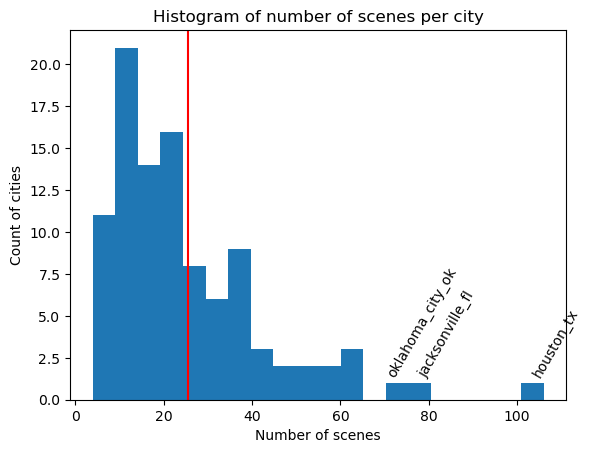

In [9]:
scenes_counts = scenes_df.city_state.value_counts().reset_index()
plt.hist(scenes_counts.city_state.values, bins = 20)
plt.axvline(scenes_counts.city_state.mean(), c = "red")
plt.title("Histogram of number of scenes per city")
plt.xlabel("Number of scenes")
plt.ylabel("Count of cities")
biggest_scenes_counts = scenes_counts[scenes_counts.city_state > 70]
for i, row in biggest_scenes_counts.iterrows():
    plt.annotate(
        row["index"],
        (row["city_state"]- 3, 1.4),
        rotation = 60
    )

plt.show()

In [11]:
125000000/512/512

476.837158203125

In [10]:
tif_files = [f for f in os.listdir("/vida/work/GDPFinder/GDPFinder/data/output/unzipped_files/") if f[-3:] == "tif"]
entity_id_tif_files = dict([(f.split("_")[0], f) for f in tif_files])

def get_size(entity_id):
    try:
        width, height = Image.open(f"../data/output/unzipped_files/{entity_id_tif_files[entity_id]}").size
    except:
        width, height = 0, 0
    return (width, height)
scenes_df["size"] = scenes_df["entity_id"].apply(get_size)
scenes_df["pixel_size"] = scenes_df["size"].apply(lambda x : x[0] * x[1])
scenes_df["image_width"] = scenes_df["size"].apply(lambda x : x[0])
scenes_df["image_height"] = scenes_df["size"].apply(lambda x : x[1])
scenes_df["number_of_images"] = scenes_df["image_height"]/512 * scenes_df["image_width"]/512 

/home/vida/gav9890/miniconda3/envs/urban_gdp/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (125662710 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/vida/gav9890/miniconda3/envs/urban_gdp/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (124066908 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/vida/gav9890/miniconda3/envs/urban_gdp/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (124540212 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/vida/gav9890/miniconda3/envs/urban_gdp/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (126531313 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/vida/gav9890/miniconda3/envs/urban_gdp

/tmp/ipykernel_3206/2672113110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  image_counts = scenes_df.groupby("city_state").sum().reset_index()


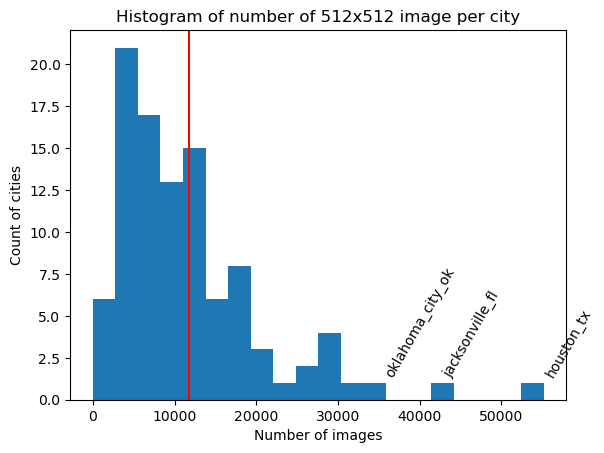

In [17]:
image_counts = scenes_df.groupby("city_state").sum().reset_index()
plt.hist(image_counts.number_of_images.values, bins = 20)
plt.axvline(image_counts.number_of_images.mean(), c = "r")
plt.title("Histogram of number of 512x512 image per city")
plt.xlabel("Number of images")
plt.ylabel("Count of cities")
for i, row in image_counts.iterrows():
    if row["number_of_images"] < 35000:
        continue
    plt.annotate(
        row["city_state"],
        (row["number_of_images"], 1.4),
        rotation = 60
    )
plt.show()